In [1]:
from google.colab import files
 
 
uploaded = files.upload()

Saving quotes - reduced.csv to quotes - reduced (3).csv


In [2]:
import io
import pandas as pd
quotes = pd.read_csv(io.BytesIO(uploaded['quotes - reduced.csv']), decimal=",")

In [3]:
!pip install tensorflow
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install pillow==4.1.1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
  Using cached Pillow-9.0.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 4.1.1
    Uninstalling Pillow-4.1.1:
      Successfully uninstalled Pillow-4.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached Pillow-4.1.1-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.0.1
    Uninstalling Pillow-9.0.1:
      Successfully uninstalled Pillow-9.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires pillow!=8.3.0,>=5.3.0, but you have pillow 4.1.1 which is incompatible.
scikit-image 0.18.3 requires pillow!=7.1.0,!=7.1.1,>=4.3.0, but you have pillow 4.1.1 which is incompatible.
pytesseract 0.3.9 requires Pillow>=8.0.0, but you have pillow 4.1.1 which is incompatible.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 4.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pytesseract
import cv2
import seaborn as sb
import tensorflow as tf
conf = r'-- oem 2'

In [5]:
#uncomment for colab ''' NOTE: Please copy the datas to folder shotcut with path /content/gdrive/MyDrive/ML_project_data/pictures/image_dataset/ '''
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [6]:
cd gdrive/MyDrive/ML_project_data/pictures/

/content/gdrive/.shortcut-targets-by-id/1Pq6YAd5542Bw36m_pWOnZiNxfcJ5vdDS/ML_project_data/pictures


The below code is only for colab.... ! If you use jupyter notebook the do not run the below cell

In [7]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
worksheet = gc.open('images_name.csv').sheet1
rows = worksheet.get_all_values()
print(rows)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
#uncomment for jupyter notebook
#df = pd.read_csv('../raw_data/images_name.csv')
#data = pd.read_csv('../raw_data/quotes.csv')


#uncomment for colab next line
df = pd.DataFrame.from_records(rows) 

df_im = df.head(2000)


In [9]:
df_im

,0,1,2
0,image_name,longest_comment,comments_5
1,1000092795,Two young guys with shaggy hair look at their ...,0 | Two young guys with shaggy hair look at...
2,10002456,Several men in hard hats are operating a giant...,5 Several men in hard hats are operating a ...
3,1000268201,A child in a pink dress is climbing up a set o...,10 | A child in a pink dress is climbing up...
4,1000344755,Someone in a blue shirt and hat is standing on...,15 | Someone in a blue shirt and hat is sta...
...,...,...,...
1995,1558848564,An intricate gold design is the backdrop to a...,9810 | An intricate gold design is the back...
1996,1558872760,A man in a pullover sweater is smiling as he h...,9815 | A man in a pullover sweater is smili...
1997,1559295897,A man is standing on mossy ground next to a c...,9820 | A man is standing on mossy ground ne...
1998,1559709077,A man attempts to fix a bike wheel on the side...,9825 | A man attempts to fix a bike wheel o...


In [10]:
#uncomment for notebook
#images = df_im['image_name']
#titles = df_im['longest_comment']

#uncomment for colab
images = df_im[0][1:]

In [11]:
images = list(images)

In [12]:
images[0]

'1000092795'

In [13]:
!pip install pillow==4.1.1

In [14]:
data = {
    'flattenPhoto' : []
    }

In [15]:
MyModel = tf.keras.models.Sequential()
MyModel.add(tf.keras.applications.ResNet50(
    include_top = True, weights=None,pooling=None,classes = 5, classifier_activation = 'softmax'
))
MyModel.layers[0].trainable = False

In [16]:
def LoadDataAndDoEssentials(path, h, w):
    img = mpimg.imread(path)
   # data['text'].append(pytesseract.image_to_string(img, config = conf))
    img = cv2.resize(img, (h, w))
    ## Expanding image dims so this represents 1 sample
    img = np.expand_dims(img, 0)
    img = tf.keras.applications.resnet50.preprocess_input(img)
    extractedFeatures = MyModel.predict(img)
    extractedFeatures = np.array(extractedFeatures)
    data['flattenPhoto'].append(extractedFeatures.flatten())

In [17]:
def ReadAndStoreMyImages(path):
    for i in images:
        imagePath = f"{path}/{i}.jpg"
        LoadDataAndDoEssentials(imagePath, 224, 224)

In [18]:
ReadAndStoreMyImages('image_dataset')

In [19]:
Training_Feature_vector = np.array(data['flattenPhoto'], dtype = 'float64')
from sklearn.cluster import AgglomerativeClustering
kmeans = AgglomerativeClustering(n_clusters = 5)
kmeans.fit(Training_Feature_vector)

AgglomerativeClustering(n_clusters=5)

In [20]:
import itertools
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import string
from sklearn.neighbors import NearestNeighbors

In [21]:
tags_list = quotes.category.to_list()
number_of_tags = []
for i in tags_list:
    number_of_tags.append(len(str(i).split(',')))

In [22]:
quotes['quotes_length'] = quotes['quote'].copy()
for index, row in quotes.iterrows():
    quotes.loc[index, "quotes_length"] = len(str(row['quotes_length']).split(' '))

In [23]:
for index, row in quotes.iterrows():
    quotes.loc[index, "category"] = str(row['category']).lower().replace('-',', ')

In [24]:
quotes['list_tags'] = quotes['category'].copy()
for index,row in quotes.iterrows():
    quotes.loc[index, 'count_tags'] = len(str(row['list_tags']).split(','))
quotes.count_tags.describe()

count    156656.000000
mean          9.747638
std          15.356019
min           1.000000
25%           3.000000
50%           5.000000
75%          11.000000
max         568.000000
Name: count_tags, dtype: float64

In [25]:
for index,row in quotes.iterrows():
    quotes.at[index, 'list_tags'] = str(row['list_tags']).split(',')

In [26]:
for index,row in quotes.iterrows():
    quotes.at[index, 'list_tags'] = str(set(row['list_tags']))

In [27]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
quotes['list_tags'] = quotes['list_tags'].apply(remove_punctuations)

In [28]:
vectorizer = TfidfVectorizer()
tags_vectorized = vectorizer.fit_transform(quotes['list_tags'])
dummy_tags = LatentDirichletAllocation(n_components=5)
lda_vectors = dummy_tags.fit_transform(tags_vectorized)

In [29]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(dummy_tags, vectorizer.fit(quotes['list_tags']))

Topic 0:
[('writing', 2110.118945066754), ('books', 1739.6072374808246), ('reading', 1380.5275545811069), ('art', 1282.710763623983), ('fiction', 1194.2272990114252), ('fantasy', 1062.4589465068652), ('reality', 847.6464149532063), ('time', 724.9720627800127), ('life', 622.5119109918444), ('purpose', 527.8086459018217)]
Topic 1:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('love', 3060.338668681086), ('inspirational', 3004.625088341231), ('life', 2394.5640862390956), ('quotes', 2094.438263662221), ('poetry', 1959.7887611292906), ('wisdom', 1891.2384935177704), ('death', 1705.900570018319), ('truth', 1662.0226207694263), ('happiness', 1561.136097072007), ('philosophy', 1524.6511157460623)]
Topic 2:
[('humor', 2062.4646626282934), ('religion', 1597.915948192159), ('humour', 1214.6977839972133), ('feminism', 1208.0002185386652), ('politics', 1199.9976265102855), ('marriage', 1143.5940707188379), ('christianity', 1078.5755532389778), ('science', 1060.4424082150624), ('god', 1056.4945906099629), ('friendship', 991.8847383103218)]
Topic 3:
[('romance', 1427.0193553554193), ('sex', 1071.8149655445593), ('love', 817.3544213955707), ('women', 643.6739017428573), ('beauty', 639.429166849138), ('inspiration', 635.9055981839595), ('dreams', 559.0523255303863), ('humor', 446.20961572474664), ('motivation', 303.12095870630696), ('funny', 295.4766321112513)]
Topic 4:

In [30]:
df_im = df_im.rename(
    columns={0:"image_name",
                1:"longest_comment",
                2:"comments_5"}
)


In [31]:
title = df_im['longest_comment'][1:]

In [32]:
title[1999]

' A large crowd is assembled on an outdoor street scene , with toy balloons visible and a woman walking a pink bicyc'

In [33]:
titles = []
for i in range(1,2000):
  titles.append(title[i])

In [34]:
titles[195]

'A boy in a pink T-shirt is riding a bike over a sand pile while two others are riding in the street .'

In [35]:
Class_of_image = []
for topic in titles:
  test_vectorized = vectorizer.transform([topic])
  lda_vectors_test = dummy_tags.transform(test_vectorized)
  Class_of_image.append(np.where(lda_vectors_test[0] == max(lda_vectors_test[0]))[0][0])

In [ ]:
Class_of_image

In [37]:
'''test_sad = ["I am so sad and I want to cry."]
test_sad_vectorized = vectorizer.transform(test_sad)

lda_vectors_sad = dummy_tags.transform(test_sad_vectorized)

print("topic 0 :", lda_vectors_sad[0][0])
print("topic 1 :", lda_vectors_sad[0][1])
print("topic 2 :", lda_vectors_sad[0][2])
print("topic 3 :", lda_vectors_sad[0][3])
print("topic 4 :", lda_vectors_sad[0][4])
print('Best topic:', np.where(lda_vectors_sad[0] == max(lda_vectors_sad[0]))[0])'''


'test_sad = ["I am so sad and I want to cry."]\ntest_sad_vectorized = vectorizer.transform(test_sad)\n\nlda_vectors_sad = dummy_tags.transform(test_sad_vectorized)\n\nprint("topic 0 :", lda_vectors_sad[0][0])\nprint("topic 1 :", lda_vectors_sad[0][1])\nprint("topic 2 :", lda_vectors_sad[0][2])\nprint("topic 3 :", lda_vectors_sad[0][3])\nprint("topic 4 :", lda_vectors_sad[0][4])\nprint(\'Best topic:\', np.where(lda_vectors_sad[0] == max(lda_vectors_sad[0]))[0])'

In [38]:
df_im = df_im.iloc[1: , :]

In [39]:
df_im['Class_of_image'] = np.array(Class_of_image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_im['Class_of_image'].nunique()

5

In [41]:
df_im['Class_of_image'] = df_im['Class_of_image'].replace([0,1,2,3,4],['topic_0','topic_1','topic_2','topic_3','topic_4'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_im['cat'] = df_im['Class_of_image'].replace(['topic_0','topic_1','topic_2','topic_3','topic_4'],[0,1,2,3,4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_im

,image_name,longest_comment,comments_5,Class_of_image,cat
1,1000092795,Two young guys with shaggy hair look at their ...,0 | Two young guys with shaggy hair look at...,topic_3,3
2,10002456,Several men in hard hats are operating a giant...,5 Several men in hard hats are operating a ...,topic_4,4
3,1000268201,A child in a pink dress is climbing up a set o...,10 | A child in a pink dress is climbing up...,topic_4,4
4,1000344755,Someone in a blue shirt and hat is standing on...,15 | Someone in a blue shirt and hat is sta...,topic_2,2
5,1000366164,"Two men , one in a gray shirt , one in a blac...","20 | Two men , one in a gray shirt , one in...",topic_3,3
...,...,...,...,...,...
1995,1558848564,An intricate gold design is the backdrop to a...,9810 | An intricate gold design is the back...,topic_0,0
1996,1558872760,A man in a pullover sweater is smiling as he h...,9815 | A man in a pullover sweater is smili...,topic_3,3
1997,1559295897,A man is standing on mossy ground next to a c...,9820 | A man is standing on mossy ground ne...,topic_4,4
1998,1559709077,A man attempts to fix a bike wheel on the side...,9825 | A man attempts to fix a bike wheel o...,topic_4,4


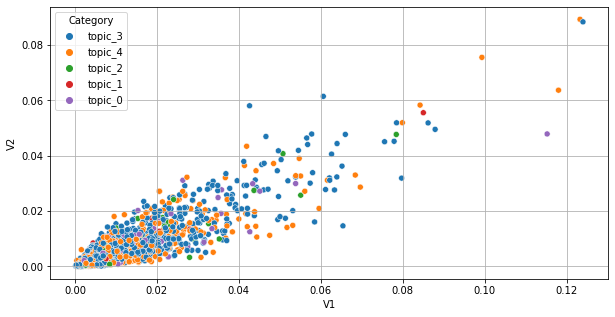

In [44]:
dimReducedDataFrame = pd.DataFrame(Training_Feature_vector)
dimReducedDataFrame = dimReducedDataFrame.rename(columns = { 0: 'V1', 1 : 'V2', 2 :'V3', 3 : 'V4',4: 'V5'})
dimReducedDataFrame['Category'] = list (df_im['Class_of_image'])
plt.figure(figsize = (10, 5))
sb.scatterplot(data = dimReducedDataFrame, x = 'V1', y = 'V2',hue = 'Category')
plt.grid(True)
plt.show()

In [45]:
len(data['flattenPhoto'])

1999

In [46]:
dimReducedDataFrame

,V1,V2,V3,V4,V5,Category
0,0.001542,0.002031,0.994001,0.002377,0.000049,topic_3
1,0.004653,0.001308,0.988234,0.005715,0.000089,topic_4
2,0.006600,0.009822,0.974112,0.008991,0.000475,topic_4
3,0.002347,0.001114,0.992131,0.004287,0.000121,topic_2
4,0.025046,0.008724,0.944598,0.020218,0.001415,topic_3
...,...,...,...,...,...,...
1994,0.002242,0.002146,0.992971,0.002520,0.000122,topic_0
1995,0.023886,0.014298,0.934003,0.024716,0.003097,topic_3
1996,0.004166,0.000510,0.991138,0.004094,0.000093,topic_4
1997,0.010285,0.005486,0.973632,0.009976,0.000621,topic_4


In [47]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

def initialize_model():
    
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(244, 244,3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(5, activation='softmax'))
    
    return model

In [48]:
from tensorflow.keras import optimizers

def compile_model(model):
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
from tensorflow.keras.utils import to_categorical
labels_train = np.expand_dims(df_im['cat'],1)
y_train = to_categorical(labels_train, 5)

In [51]:
def LoadData(path, h, w):
    X = []
    for i in images:
        imagePath = f"{path}/{i}.jpg"
        img = mpimg.imread(imagePath)
        img = cv2.resize(img, (h, w))
        img = tf.keras.applications.resnet50.preprocess_input(img)
        X.append(img)
    return np.array(X)

In [52]:
X_train = LoadData('image_dataset', 244, 244)

In [66]:
X_train.shape , y_train.shape

((1999, 244, 244, 3), (1999, 5))

In [67]:
model = initialize_model()
model = compile_model(model)

es = EarlyStopping(patience=5, verbose=2)

history = model.fit(X_train, y_train, 
                        validation_split=0.3,
                        callbacks=[es], 
                        epochs=100, 
                        batch_size=64)

Epoch 1/100
22/22 [==============================] - 6s 156ms/step - loss: 264.1377 - accuracy: 0.4332 - val_loss: 1.7082 - val_accuracy: 0.2983
Epoch 2/100
22/22 [==============================] - 2s 102ms/step - loss: 1.6354 - accuracy: 0.5361 - val_loss: 1.5869 - val_accuracy: 0.3183
Epoch 3/100
22/22 [==============================] - 2s 102ms/step - loss: 1.5799 - accuracy: 0.5640 - val_loss: 1.4896 - val_accuracy: 0.5533
Epoch 4/100
22/22 [==============================] - 2s 104ms/step - loss: 1.5697 - accuracy: 0.5654 - val_loss: 1.5656 - val_accuracy: 0.5367
Epoch 5/100
22/22 [==============================] - 2s 102ms/step - loss: 1.5383 - accuracy: 0.5654 - val_loss: 1.5398 - val_accuracy: 0.5467
Epoch 6/100
22/22 [==============================] - 2s 101ms/step - loss: 1.5182 - accuracy: 0.5654 - val_loss: 1.5211 - val_accuracy: 0.5533
Epoch 7/100
22/22 [==============================] - 2s 102ms/step - loss: 1.4997 - accuracy: 0.5661 - val_loss: 1.5032 - val_accuracy: 0.55

In [68]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

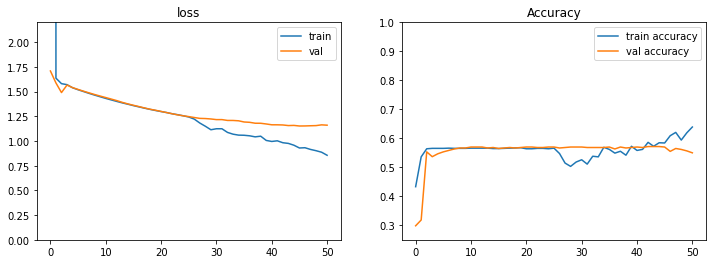

In [69]:
plot_history(history)
plt.show()